# Electron Charge-to-Mass Ratio
Jelena Colon and Alex Orellano

# Abstract

The purpose of this experiment is to measure the ratio of charge to mass of an electron from the radius of curvature of an electron beam traveling in a known magnetic field. An electron beam of a specified voltage was emitted and the trajectory (radius) of the speeding electrons was measured and used to calculate the charge to mass ratio as being   .

# Introduction 


The electron charge to mass ratio was an experiment that was used to calculate the ratio of the electron’s charge to its mass. A beam of electrons was used that was subjected to a magnetic field that caused it to travel in a circle. This experiment was one of the first experiments to attempt to find the charge or mass of an electron. In performing this experiment, an electron source, a heated tungsten filament and an electrode, and Helmholtz coils are used to
create the magnetic field. 



# Procedure

<img src="JC_RO.jpg">
Figure 1: Setup (https://www.pasco.com/prodCompare/electron-charge-to-mass-ratio-system/index.cfm)

After letting the filament heat up in the bulb between the Helmholtz coils, we set the current to a non-specified value, in no order to accommodate a wide range of values between .87 - 3.35 Amps. The magnetic field caused by the Helmholtz coils will cause the electron beam to curve upward until it makes a full circle within the bulb. The electron beam is blue-green in color and was measured by placing the center of a bulb as close to the 10.5 cm line on the ruler that is fixed to the apparatus as possible. From the center, the radius of the electron beam was measure to the center of the electron beam on each side of the electron beam arc. Each electron beam was measured from both sides by each partner to find the average radius from each electron beam circle at various currents. After recording the average radius of each electron beam we graphed the data in an R^2 vs. I^2 line plot to find the slope of the Charge-to-mass Ratio. 

# Data

In [8]:
from astropy.io import ascii
data = ascii.read('ECTMR_RO_JC_LAB06.csv')
print(data)

voltage current radius
------- ------- ------
    120    0.87   70.8
    120     3.5   16.5
    120     1.3   49.9
    120    3.35   18.8
    120    1.45   44.4
    120     1.0   62.3
    120    2.75   22.9
    120    1.15   54.5
    120     1.6   40.0
    120     3.2   20.3
    120    1.75   36.1
    120    3.05   20.8
    120     2.6   24.4
    120     2.9   21.8
    120    2.45   26.0
    120     2.3   26.9
    120    2.15   29.0
    120     2.0   32.1
    120    1.85   33.6


# Analysis / Calculations


An electron moving in a uniform magnetic field travels in a circular path perpendicular to the magnetic field. The electron's equation of motion can be written as:

FB=evB

where FB is the magnetic force, e is the charge of an electron, v is the speed of the electron and B is the magnetic field.

For an electron moving in a circle the centripetal force is:

FC=mv^2/R

where FC is the centripetal force, m is the mass of the electron, v is the speed of the electron and R is the radius of curvature of its trajectory.

By setting the two equations equal to each other you get:

evB=mv^2/R

By plugging in equations for velocity and magnetic field, the equation becomes,

r^2=(2*U*(5/4)^3*R^2*m)/(I^2*N^2*M^2*e)

where r is the radius of curvature of the electron beams trajectory, U is the voltage, R is the radius of the hemholtz coils, m is the mass of an electron, I is the current, N is the number of turns per coil and M is the permeablitiy constant.

By plotting r^2 vs 1/I^2 the slope is mathematically equal to (2*U*(5/4)^3*R^2*m)/(N^2*M^2*e)

and the charge to mass ratio can be found by rearranging the equation to yield:

e/m=(2*U*(5/4)^3*R^2)/(slope*N^2*M^2)

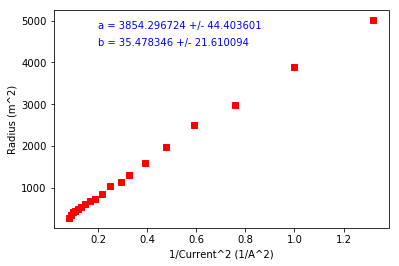

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from scipy.optimize import curve_fit
from matplotlib import pyplot
%matplotlib inline

#assign variables to data
R=data['radius']**2
I=1/data['current']**2


#trendline
def func (x, a, b):
    return a*x + b

popt, pcov = curve_fit(func, I, R,) #couldnt get a trendline



plt.plot(I, R, 'rs')

plt.text(0.2, 4800, r"a = {0:.6f} +/- {1:.6f}".format(popt[0], pcov[0,0]**0.5),color="blue")
plt.text(0.2, 4400, r"b = {0:.6f} +/- {1:.6f}".format(popt[1], pcov[1,1]**0.5),color="blue")

plt.ylabel('Radius (m^2)')
plt.xlabel('1/Current^2 (1/A^2)')
plt.show()

In [63]:
#define variables
U=200 
N=130
R=.158 
slope=popt[0]
M=(12.5663706144*10**-7) 


em=(2*U*(125/64)*(R**2))/(((N*M)**2)*slope)

print('The charge to mass ratio of an electron was calculated to be', em, 'C/kg')

The charge to mass ratio of an electron was calculated to be 189606.23986 C/kg


# Conclusion

